# P2 Analyse exploratoire

sous table des matières : reprendre les données  
(shape, display, describe)  

## Sommaire

- [Introduction](#intro)
  - [Problématique](#problematique)  
  - [Imports Python](#imports)  
  - [Chargement des données](#charg_donnees)  
  - [Survol des données](#charg_donnees)  

## Introduction <a name="intro"></a>

### Problématique <a name="problematique"></a>

L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts et souhaite la création d’un système de **suggestion ou d’auto-complétion** pour aider les usagers à remplir plus efficacement la base de données.

⚠️ MISSION → **nettoyage et exploration** des données en interne, afin de **déterminer la faisabilité de cette idée d’application**.  

Liens utiles : [projet OC](https://openclassrooms.com/fr/paths/794/projects/1500/assignment), [data](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip), [définition des variables](https://world.openfoodfacts.org/data/data-fields.txt)  

### Imports Python <a name="imports"></a>

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

### Chargement des données <a name="charg_donnees"></a>

In [43]:
DATASETS_PATH = "/Users/julmat/DataSets/"
dataset_name="oc_p2_openfoodfacts_products.csv"

data_raw = pd.read_csv(DATASETS_PATH+dataset_name, sep="\t", index_col=7)

display(data_raw)

/var/folders/ks/c88gvk111fgfy224r4gqv7mc0000gn/T/ipykernel_97119/3900781032.py:4: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,generic_name,quantity,packaging,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
product_name,,,,,,,,,,,,,,,,,,,,,
Farine de blé noir,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,NaN,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Chips Sweetened (Whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
Peanuts,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
Organic Salted Nut Mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
Organic Polenta,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomato & ricotta,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,NaN,1,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,NaN,NaN,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
乐吧泡菜味薯片,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,Leba pickle flavor potato chips,50 g,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tour d'horizon <a name="horizon"></a>

### Types de données <a name="data_types"></a>

Doublons : 0

Type de données :


<AxesSubplot: >

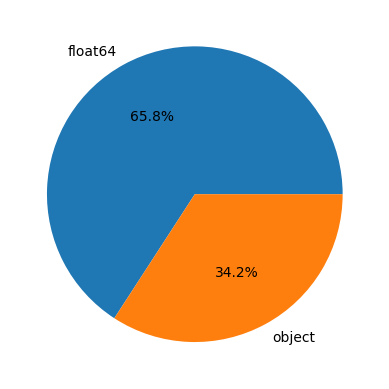

In [44]:
print(f"Doublons : {data_raw.duplicated().sum()}")
print("\nType de données :")

data_raw.dtypes.value_counts().plot.pie(
    autopct="%1.1f%%"
    )

### Structure des données <a name="structure"></a>

In [45]:
with pd.option_context('display.max_rows', 200):
    display(data_raw.describe().T.sort_index())

,count,mean,std,min,25%,50%,75%,max
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
alcohol_100g,4133.0,7.838105,1.095967e+01,0.000000,0.000000e+00,5.000000,12.000000,9.790000e+01
alpha-linolenic-acid_100g,186.0,2.250285,7.971418e+00,0.000000,6.875000e-02,0.117500,0.604000,7.500000e+01
arachidic-acid_100g,24.0,10.752667,4.019993e+00,0.064000,7.275000e+00,12.850000,13.375000,1.540000e+01
arachidonic-acid_100g,8.0,0.057000,2.553429e-02,0.007000,4.625000e-02,0.061000,0.068500,9.000000e-02
behenic-acid_100g,23.0,10.673913,3.379647e+00,5.200000,7.100000e+00,12.600000,13.050000,1.460000e+01
beta-carotene_100g,34.0,0.518715,2.561144e+00,0.000000,1.225000e-03,0.005261,0.140000,1.500000e+01
bicarbonate_100g,81.0,0.119052,1.894861e-01,0.000006,1.732000e-02,0.036000,0.143000,1.250000e+00
biotin_100g,330.0,0.121290,7.379124e-01,-2.000000,5.725000e-06,0.000014,0.000041,6.000000e+00
butyric-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Valeurs manquantes <a name="nulls"></a>

(161, 2)


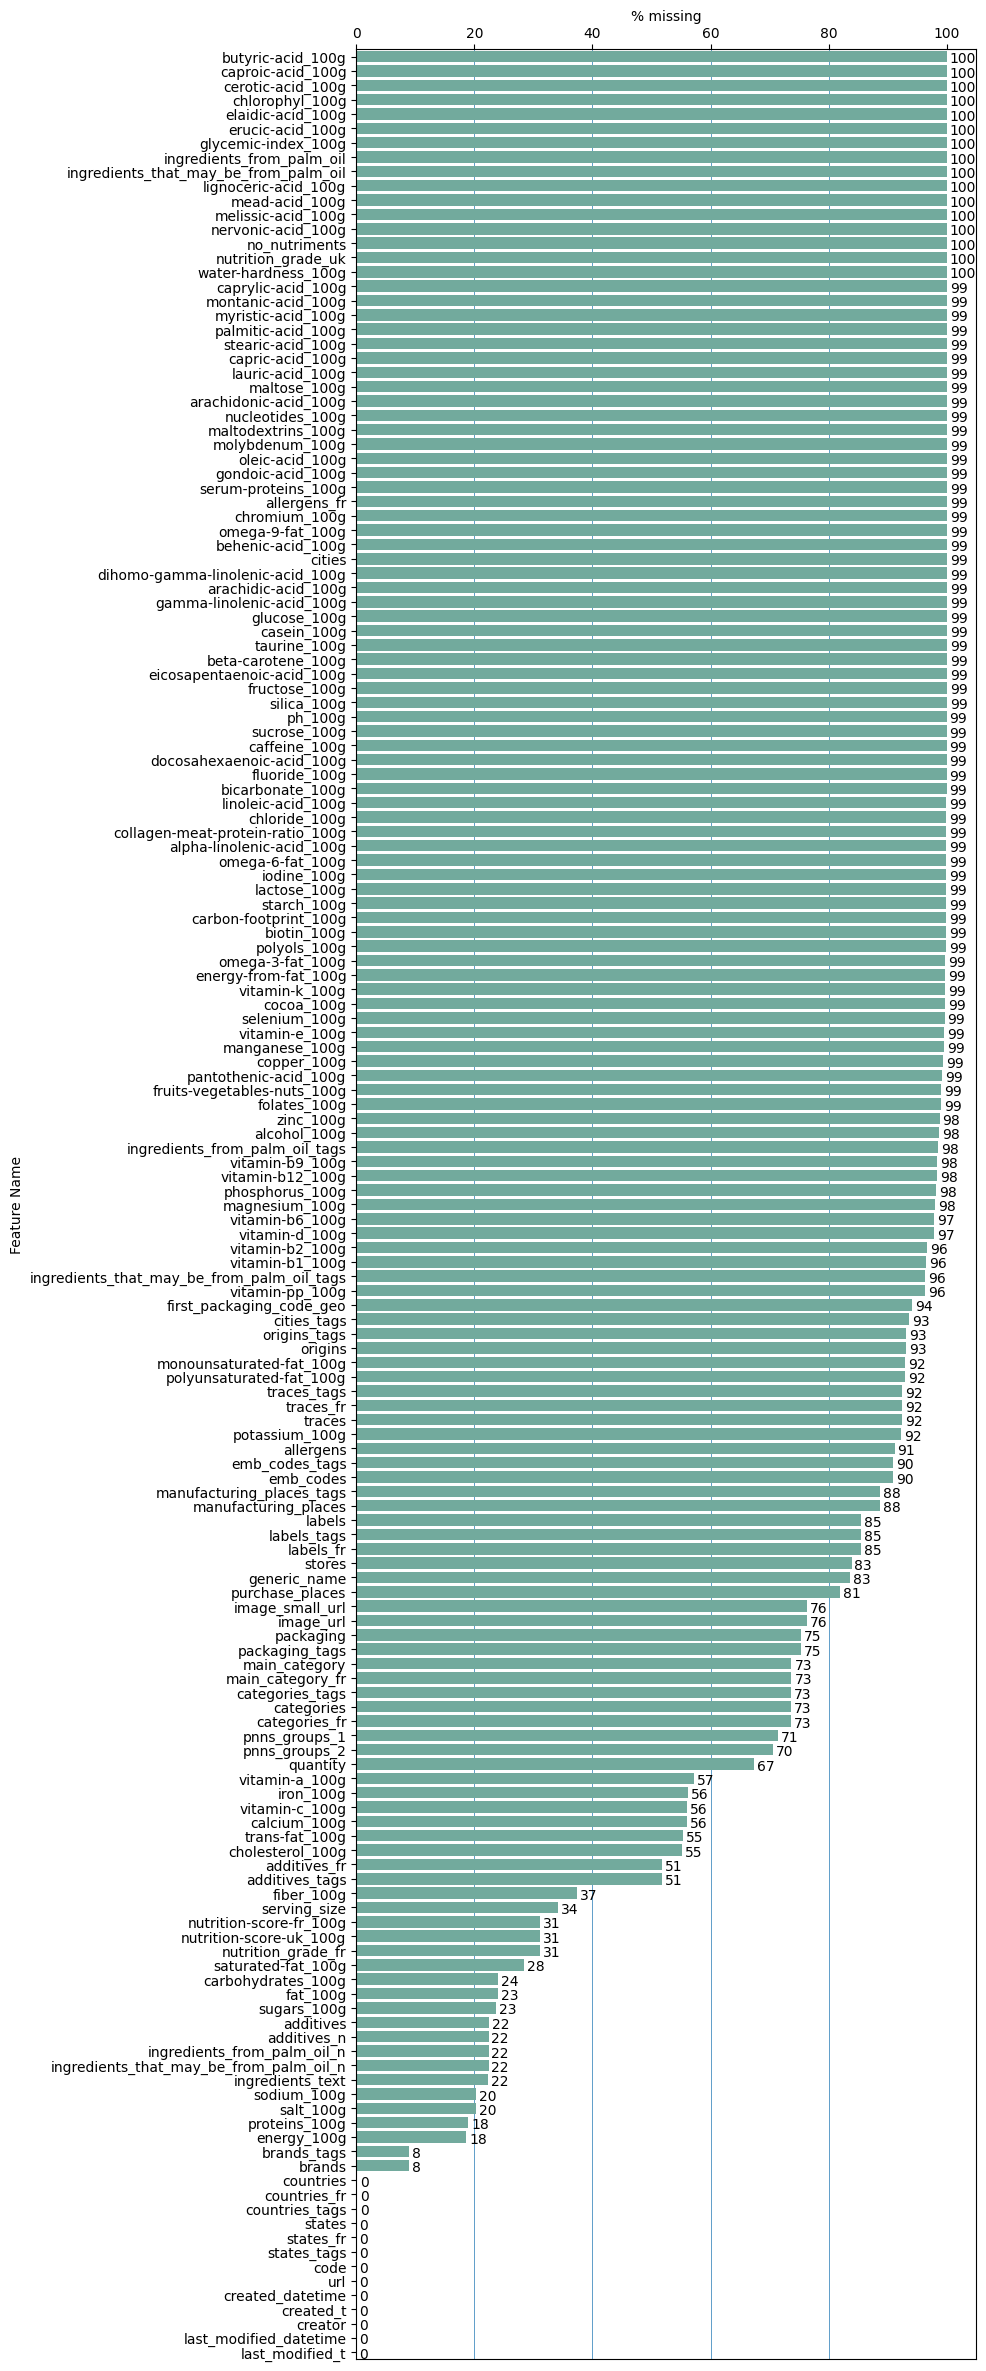

In [46]:
# valeurs nulles en pourcentage et triées
def percent_missing(df):
    ds_isnull_prct = (df.isnull().mean()*100)
    
    # set Series to DF for further display
    df_isnull_prct = pd.DataFrame({
        "Feature Name": df.columns,
        "% missing": ds_isnull_prct,
        }).sort_values(by=["% missing", "Feature Name"],
                       ascending=[False, True]
                       ).reset_index(drop=True)
    
    return df_isnull_prct

# afficher la valeur sur l'axe
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

data_nulls_by_value = percent_missing(data_raw)

plt.figure(figsize=(8, 30))

sns_t = sns.barplot(
    x="% missing", 
    y="Feature Name", 
    data=data_nulls_by_value, 
    color='#69b3a2'
)

sns_t.xaxis.set_ticks_position("top")
sns_t.xaxis.set_label_position('top')
sns_t.axvline(x=20, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=40, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=60, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=80, ymin=0, linewidth=0.5, zorder=0)

show_values_on_bars(sns_t, "h", 0.5)
print(data_nulls_by_value.shape)

### Constat <a name="constat"></a>

Notre tour d'horizon des données met en lumière plusieurs points :
- les données sont **souvent remplies** par les utilisateurs, avec plus de 320 000 observations
- mais la **qualité de ce remplissage n'est pas forcément au rendez-vous** avec une majorité des valeurs manquantes à plus de 90%.

Tous les champs ne sont pas à remplir, comme la teneur en potassium d'un produit n'en contenant pas, par exemple.  
Mais des valeurs comme l'énergie pour 100g ne peuvent a priori pas être nulles.

Les **variables manquant de données à plus de 60% sont écartées** car leur remplissage générerait un biais trop important.

Pour les données pertinentes manquantes et les outliers, nous devrons trouver des méthodes d'imputation.

## Choix d'étude : nutri-score <a name="choix"></a>

Au vu de l'**activité du client** et des **données restantes pouvant être étudiées**, il me paraît pertinent de répondre à sa demande en nous intéressant au **Nutri-Score**.  
3 variables peuvent faire partie de notre cible :
- `nutrition_grade_fr`
- `nutrition-score-fr_100g`
- `nutrition-score-uk_100g`

Pour chacune d'entre elles il **manque 31% des données**, ce est suffisamment important pour devoir être comblé, d'autant que c'est là un des coeurs d'activités du client.

### Calculs et classification du Nutri-Score

Voici les modalités de **calcul général du nutri-score et la classification** qui s'en suit :

> <img title="Nutri-Score : calcul général" src="https://julmat.fr/OCP2/nutriscore_general_calculation.png" height="320">
> <img title="Nutri-Score : classification" src="https://julmat.fr/OCP2/nutriscore_classification.png" height="320">

Sources : [Informations OpenFoodFacts sur le Nutriscore](https://fr.openfoodfacts.org/nutriscore) et [Calcul du nutriscore (PDF, dern. màj 2022-09-27)](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en)

Cela nous amène à plusieurs problématiques :
- déjà, malgré une règle générale simple, la **complexité de calcul** (produits couverts ou non, gestion des exceptions, des règles spécifiques...) ne nous permet pas, à partir de notre seul jeu de données, de produire un nutri-score fiable ;
- ajoutons à cela les **mises à jour régulières des calculs** du Nutri-Score, dont une en cours.

L'utilisation du **Machine Learning semble _a priori_ indiquée pour approcher cette valeur** avec une certaine fiabilité à partir du jeu de données dont nous disposons.

### Nutri-Score : choix de variable cible

On voit aussi dans les sources que le Nutrition Score français est celui utilisé pour la classification du Nutri-Score.  
Le Nutrition Score français est lui-même dérivé du Nutrition Score anglais.

Ainsi, on peut se concentrer sur une seule de ces 3 variables et enlever les deux autres de notre jeu de données d'entraînement

*******************
*******************
#### TODO

- montrer autrement **valeurs manquantes (camembert** par classe 10% manquantes)
- suppression des 2 autres variables
- finir nettoyage : 100g : <0 → 0, >100 → 100, NaN → 0
- enlever outliers & aberrations + imputation
- 
- ? Vérif pourquoi / besoin (cf. TP) 2.4 : data split
- check référentiel évaluation  
- Feature importance
- faire ACP ac matrice corrélation + ANOVA + p-value
- vérif duplicates lignes
- camemberts pr répartition `nutrition_grade_fr` (nb & %) + histogrammes pr `nutrition-score-fr_100g` et `nutrition-score-uk_100g`
- faire analyse univariée + bivariée selon cours OC : <https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7427699-representez-la-distribution-empirique-dune-variable>

Objectifs :
- méthode applicable à ce cas métier pour remplir les null (nombreux) :
  - tester + montrer prq pas top : moyenne
  - idem médiane
  - trouver méthode applicable avec métier

indice : rester "proche"  
commencer par spliter le DS selon bins variable cible pour moyenne pas trop éloignée)
solution de machine learning existante (voire DL) à trouver

**************

**LIVRABLE**

**Notebook** : une analyse univariée, multivariée, une analyse en composante principale (ACP) + différentes questions de recherches associées)  
**Présentation** : 
- opérations de nettoyage effectuées
- description et analyse univariée des différentes variables importantes avec les visualisations associées
- analyse multivariée et les résultats statistiques associés, en lien avec l’idée d’application du client
- 3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de l’idée application du client.
- synthèse des différentes conclusions sur la faisabilité de votre projet.

1) Traiter le jeu de données.

Repérer des **variables pertinentes** pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes,.
**Nettoyer** les données en :
   - mettant en évidence les **éventuelles valeurs manquantes parmis les variables pertinentes sélectionnées avec au moins 3 méthodes de traitement adaptées** aux variables concernées,
   - identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
- **Automatiser ces traitements** pour éviter de répéter ces opérations

Attention, le client souhaite que le programme fonctionne si la base de données est légèrement modifiée (ajout d’entrées, par exemple) !

2) Tout au long de l’analyse, **produire des visualisations** afin de mieux comprendre les données.  
Effectuer une **analyse univariée pour chaque variable intéressante**, afin de synthétiser son comportement.  

TODO : 1 de chaque : boxplot, barplot, pie chart, histogramme, scatter plot

Et un mot à ce sujet : le client nous demande de réaliser une présentation qui permet d’expliquer les analyses faites à un public néophyte. Sois donc attentif à la **lisibilité** : taille des textes, choix des couleurs, netteté suffisante, et **variez les graphiques** (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux ton propos.

3) Sélectionner / créer des variables à l’aide d’une **analyse multivariée**. Effectuer les **tests statistiques** appropriés pour vérifier la significativité des résultats.

4) Rédiger un **rapport d’exploration** et une **conclusion pour expliquer la faisabilité de l’application** demandée.

5) Même si les données n’incluent pas de données personnelles, on doit expliquer dans une présentation **en quoi ce projet respecte les 5 grands principes du RGPD**.  
→ montrer l'absence de lien entre travail et RGPD
***********
***********

## Nettoyage des données

Certaines variables ont été identifiées comme peu pertinentes, notamment :
- celles qui semblent obligatoires pour l'utilisateur et **remplies d'office** (e.g. `creator`, `code`, `url`, etc.)
- celles dont l'**obtention est automatique ou automatisable** à partir d'autres variables (`created_datetime`, `last_modified_t`, `additives`, etc.)
- celles qui **manquent de pertinence** pour la variable cible (`countries`, `labels`, `manufacturing_places`, etc.)
- celles dont le **format de données est trop peu compatible** avec l'étude en cours et qui nécessiteraient un traitement trop important, par exemple les données contenant des tags ou des chaînes de caractères dont le format utilisateur est libre (`ingredients_text`, `categories_fr`, etc.).  
Elles pourront servir dans les contrôles ou l'interprétation des résultats.

NB : si des données comme `origin`, `packaging`, `ingredients_from_palm_oil`, `purchase_places`, `manufacturing_places` ou `countries` ont été écartées faute de pertinence, elles pourraient toutefois avoir un intérêt avec d'autres études comme l'Éco Score, l'impact socio-économique des fabrications à l'étranger, etc.

Sont aussi écartées :
- les variables **100% vides**
- les variables avec **plus de 60% de valeurs manquantes** car leur remplissage aurait trop d'impact sur les données

Enfin, les lignes totalement vides sont supprimées et le pourcentage de valeurs manquantes remis à jour.

Les impacts de ce nettoyage sont monitorés au fur et à mesure.

Suppression colonnes 100% vides + maintien des variables ⊃ < 60% de null (tri par nom de variable) :

In [47]:
# suppression des variables à écarter
excluded_features = ['additives', 'additives_fr', 'additives_tags',
                      'allergens', 'allergens_fr',
                      'brands', 'brands_tags',
                      'categories', 'categories_fr', 'categories_tags',
                      'cities', 'cities_tags', 'code',
                      'countries', 'countries_fr', 'countries_tags',
                      'created_datetime', 'created_t', 'creator',
                      'emb_codes', 'emb_codes_tags',
                      'first_packaging_code_geo',
                      'generic_name', 'image_small_url', 'image_url',
                      'ingredients_text',
                      'ingredients_from_palm_oil',
                      'ingredients_from_palm_oil_n',
                      'ingredients_from_palm_oil_tags',
                      'ingredients_that_may_be_from_palm_oil',
                      'ingredients_that_may_be_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil_tags',
                      'labels', 'labels_fr', 'labels_tags',
                      'last_modified_t', 'last_modified_datetime',
                      'main_category', 'main_category_fr',
                      'manufacturing_places', 'manufacturing_places_tags',
                      'origins', 'origins_tags',
                      'packaging', 'packaging_tags',
                      'pnns_groups_1', 'pnns_groups_2',
                      'purchase_places', 'quantity', 'serving_size',
                      'states', 'states_fr', 'states_tags', 'stores',
                      'traces', 'traces_tags', 'traces_fr', 'url']
df_clean_excluded_features = data_raw.drop(excluded_features, axis=1)

print(f"DF brut : {data_raw.shape}")
print("DF après nettoyage des variables exclues : {}".format(
    df_clean_excluded_features.shape))

DF brut : (320772, 161)
DF après nettoyage des variables exclues : (320772, 103)


In [48]:
# À SUPPRIMER outil JL
# Vérification rapide d'une variable / valeur selon regex

regex_ = "(nutri|categ)"

df_temp = data_raw.filter(regex=regex_).dropna(how="all")

with pd.option_context('display.max_rows', 100):
    display(df_temp
            .filter(regex=".*", axis=0)
            .filter(regex=regex_)
            .dropna(how="all")
            # .T
            .sort_index(ascending=False)
            )

,categories,categories_tags,categories_fr,no_nutriments,nutrition_grade_uk,nutrition_grade_fr,main_category,main_category_fr,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,
콩두유,Soymilk,ko:soymilk,ko:Soymilk,NaN,NaN,b,ko:soymilk,ko:Soymilk,1.0,1.0
칠성사이다,"en:beverages,en:carbonated-drinks,en:sodas,en:...","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Boissons sucrées",NaN,NaN,e,en:sodas,Sodas,13.0,1.0
초고추장,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,11.0,11.0
자연은 튼튼 (Jayeon-eun Teunteun),Boisson à l'aloe vera,fr:boisson-a-l-aloe-vera,Boisson-a-l-aloe-vera,NaN,NaN,NaN,fr:boisson-a-l-aloe-vera,Boisson-a-l-aloe-vera,NaN,NaN
오뜨 프로마즈,"Sugary snacks,Desserts,Biscuits and cakes,Cakes","en:sugary-snacks,en:biscuits-and-cakes,en:dess...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",NaN,NaN,b,en:cakes,Gâteaux,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
NaN,fr:Pâtes à tartiner aux noisettes et au cacao,"en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,NaN,NaN,fr:pates-a-tartiner,Pâtes à tartiner,NaN,NaN
NaN,fr:Pâtes à tartiner aux noisettes et au cacao,"en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,NaN,NaN,fr:pates-a-tartiner,Pâtes à tartiner,NaN,NaN
NaN,Colas,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",NaN,NaN,NaN,en:sodas,Sodas,NaN,NaN


In [49]:

# suppression des variables totalement vides
df_no_feature = df_clean_excluded_features.dropna(axis=1, how='all')

print("DF après nettoyage des variables vides : {}".format(
    df_no_feature.shape))

DF après nettoyage des variables vides : (320772, 89)


In [50]:
# masque des variables avec moins de 60% de null
features_nullprct = df_no_feature.isnull().mean()*100
mask = features_nullprct <= 60

# création du DF nettoyé
df = df_no_feature[features_nullprct[mask].index]

with pd.option_context('display.max_rows', 200):
    display(df.T.sort_index())

product_name,Farine de blé noir,Banana Chips Sweetened (Whole),Peanuts,Organic Salted Nut Mix,Organic Polenta,Breadshop Honey Gone Nuts Granola,Organic Long Grain White Rice,Organic Muesli,Organic Dark Chocolate Minis,Organic Sunflower Oil,...,Szprot w oleju roslinnym,Thé vert Earl grey,"Cheese cake thé vert, yuzu",Rillette d'oie,NaN,Tomato & ricotta,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",乐吧泡菜味薯片,Tomates aux Vermicelles,"Sugar Free Drink Mix, Peach Tea"
additives_n,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,7.0
calcium_100g,NaN,0.0,0.071,0.143,NaN,0.038,0.044,0.062,0.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
carbohydrates_100g,NaN,64.29,60.71,17.86,77.14,63.46,80.0,57.81,55.0,NaN,...,NaN,0.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
cholesterol_100g,NaN,0.018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
energy_100g,NaN,2243.0,1941.0,2540.0,1552.0,1933.0,1490.0,1833.0,2406.0,3586.0,...,NaN,21.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2092.0
fat_100g,NaN,28.57,17.86,57.14,1.43,18.27,NaN,18.75,37.5,100.0,...,NaN,0.2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
fiber_100g,NaN,3.6,7.1,7.1,5.7,7.7,NaN,9.4,7.5,NaN,...,NaN,0.2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
iron_100g,NaN,0.00129,0.00129,0.00514,NaN,0.00346,NaN,0.00422,0.01125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
nutrition-score-fr_100g,NaN,14.0,0.0,12.0,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
nutrition-score-uk_100g,NaN,14.0,0.0,12.0,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [51]:
# affichage des variables restantes et % nulls
df_prct_missing = percent_missing(df)

fig = px.histogram(df_prct_missing, x="% missing", 
    y="Feature Name",
    width=800, height=df_prct_missing.shape[0]*22
    ).update_yaxes(categoryorder='category descending')

fig.show()
print(df.shape)

(320772, 19)


In [52]:
# suppression des lignes vides
df.dropna(axis=0, how="all", inplace=True)

# affichage des variables restantes et % nulls mis à jour
df_prct_missing = percent_missing(df)

fig = px.histogram(df_prct_missing, x="% missing", 
    y="Feature Name",
    width=800, height=df_prct_missing.shape[0]*22
    ).update_yaxes(categoryorder='category descending')

fig.show()
print(df.shape)

/var/folders/ks/c88gvk111fgfy224r4gqv7mc0000gn/T/ipykernel_97119/1670771496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(276234, 19)


### Affinage des variables cibles

Les 3 variables cibles potentielles (`nutrition_grade_fr`, `nutrition-score-fr_100g` et `nutrition-score-uk_100g`) doivent maintenant être comparées afin de choisir la variable cible la plus pertinente.

In [53]:
df_temp = df.loc[
    df['nutrition-score-fr_100g'] != df['nutrition-score-uk_100g']]
display(df_temp[['nutrition-score-fr_100g', 'nutrition-score-uk_100g',
                     'nutrition_grade_fr']].dropna(how="all").sort_index(ascending=True))

,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_fr
product_name,,,
Bridelight 3% Les carrés fondants goût Emmental,6.0,11.0,c
100 % Pur Jus Pomme,3.0,-3.0,c
Douceur du Matin,5.0,-4.0,c
Edition Limitée Mandarine Kiwi Citron,5.0,-4.0,c
Frisch-Genuss,9.0,13.0,c
...,...,...,...
NaN,7.0,1.0,d
NaN,33.0,28.0,e
NaN,10.0,15.0,c


On constate déjà qu'il y a une **différence sur certaines observations dans les scores de nutrition FR et UK**.  
Nous ne pouvons pas savoir si c'est dû à une différence dans le mode de calcul ou des erreurs de saisies, ces observations représentant **8322 lignes sur 276234 (≈ 3%** des données exploitables).

In [54]:
# TODO mettre ici exemple décorrélation a priori

## Suggestions d'améliorations

(éco-score & produits laitiers ; ergonomie, ui, ux application)

Catégorie : **solide ou liquide** = forte influence sur le nutri-score et seulement disponible dans la `category`.  
Distinguer clairement dès le début de la saisie (et préciser que les huiles ne sont pas des boissons).

**Éco-score + socio-score** :  
montrer les trajets sur une carte animée pour chaque produit (origine des ingrédients → fabrication → conditionnement intermédiaire → packaging → distribution), calculer les distances et visualiser rapidement des informations sur chaque étape (salaire moyen, droit du travail, condition animale, ...)  
création d'un score social ?

Variables à remplir **par user avec suggestion** :
- additives_tags → remplit automatiquement : additives_n, additives, additives_fr
- brands → remplit automatiquement : brands_tags (nouvelle marque ajoutable par user, suggérer existantes si ressemblantes)
- countries_tags → remplit automatiquement : countries, countries_fr
- states_tag → remplit automatiquement : states, states_fr

<AxesSubplot: ylabel='product_name'>

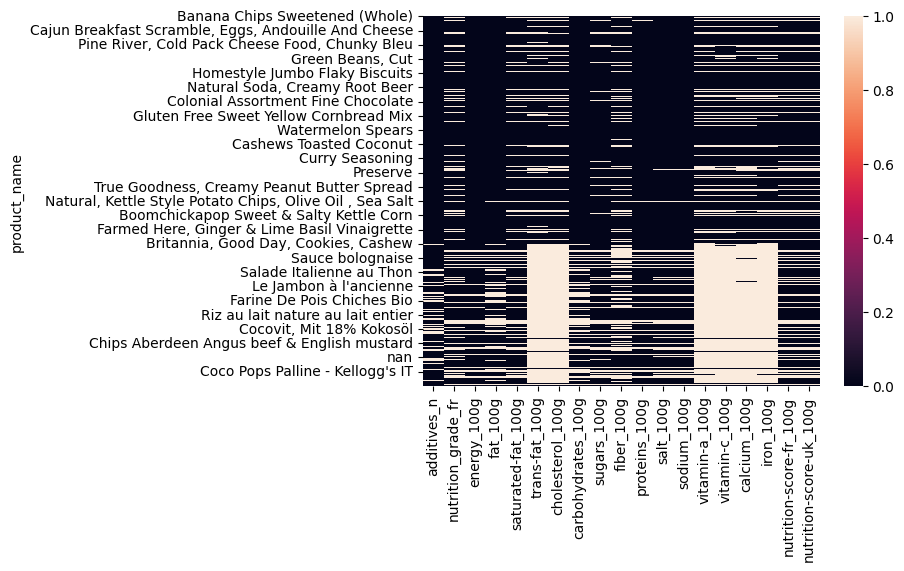

In [55]:
sns.heatmap(df.isna())